## Fashion Product Images
In this project we will be predicting a fashion product image's category and gender. The product' s category will be divided into three, Main Category, Sub Category, and Article Type. The learning algorithm that we will be using is only limited to Random Forest and XGBoost.

In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
import pandas as pd 
import seaborn as sns
import os 

In [2]:
# Import Dataset
DATASET_PATH = "/Purwadhika/FINAL PROJECT/test1/fashion-dataset/fashion-dataset/"
print(os.listdir(DATASET_PATH))

['images', 'images.csv', 'styles', 'styles.csv']


### Load Data

In [3]:
df_embs = pd.read_csv('embedded2.csv')
df_embs.drop('Unnamed: 0',axis=1,inplace=True)
df_embs

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,5.649736,9.132717,0.000000,8.552013,0.000000,0.106650,16.067930,2.754838,0.000000,0.000000,...,1.330357,0.111984,9.504754,4.337305,0.074342,0.000000,7.377696,0.026429,0.000000,8.451321
1,0.000000,2.788229,0.754297,0.000000,2.539878,3.851845,3.080238,0.000000,0.641055,1.447005,...,0.159295,13.468638,2.867096,1.598586,2.556869,0.378737,5.992522,0.653195,13.689517,11.015627
2,5.914846,2.232292,0.000000,11.802919,0.000000,0.000000,8.595102,3.762110,0.000000,1.319177,...,17.136992,0.000000,3.226575,1.980115,0.000000,0.000000,6.165443,0.948540,1.757253,1.303848
3,0.861216,3.639449,0.000000,3.721268,0.000000,0.000000,0.704272,1.156900,1.219262,2.974664,...,4.385935,3.835477,3.504012,17.089266,0.000000,0.000000,2.154345,2.161019,0.000000,7.274156
4,1.039733,9.232069,0.000000,1.483310,0.000000,0.000000,0.986046,3.571916,0.619291,0.646493,...,0.632879,1.290295,6.424055,0.000000,0.581709,0.000000,18.104776,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22651,3.165389,37.920837,8.676129,0.000000,2.033258,1.412931,2.870075,1.567106,2.295701,1.007221,...,3.339962,1.700938,0.000000,2.572877,4.052027,0.000000,3.152189,4.633288,7.057969,24.706306
22652,0.000000,34.038080,7.112828,0.579148,0.936001,1.200150,1.739207,0.960047,1.091176,0.000000,...,4.406452,2.136025,1.957094,0.223044,6.861034,0.365381,4.310698,0.000000,0.000000,13.679068
22653,2.970888,16.468681,1.361128,1.985318,0.276024,0.000000,7.925969,0.754939,1.195237,3.516096,...,12.242370,1.994565,0.573752,18.099092,1.855864,0.000000,1.042364,1.962243,2.990560,24.255568
22654,0.000000,0.104550,2.345689,4.225636,0.532689,8.728232,22.250055,0.378685,0.000000,1.664020,...,15.755005,5.040476,4.630026,0.000000,1.135384,9.161121,8.029400,8.505575,3.569754,2.585377


In [4]:
df = pd.read_csv('final_styles2.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
1,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
2,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
3,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,26960.jpg
4,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks,29114.jpg
...,...,...,...,...,...,...,...,...,...,...,...
22651,38479,Boys,Apparel,Topwear,Tshirts,Green,Summer,2012.0,Casual,Gini and Jony Boys Core Green T-shirt,38479.jpg
22652,30614,Men,Apparel,Topwear,Tshirts,Black,Summer,2012.0,Sports,Nike Men Striped Black Jersey,30614.jpg
22653,12544,Women,Apparel,Topwear,Tshirts,Peach,Fall,2011.0,Casual,Tantra Women Printed Peach T-shirt,12544.jpg
22654,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg


### Calculating Accuracy Scores for various n components values on PCA

### Article Type

#### Using Random Forest Classifier

In [10]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

def get_score_randomforest(X_train,X_test,y_train,y_test):
    # train randomforest
    randomforest = RandomForestClassifier(random_state=101)
    randomforest.fit(X_train,y_train)
    rf_models.append(randomforest)

    # get accuracy score
    pred = randomforest.predict(X_test)
    return accuracy_score(y_test, pred)

def do_first_randomforest_smote(col):
    for i in n_pca:
        # scaling
        scaler = StandardScaler()
        scaler.fit(df_embs)
        scaled_data = scaler.transform(df_embs)

        # pca
        t_pca = PCA(n_components=i,random_state=101)
        t_pca.fit(scaled_data)
        pca.append(t_pca)
        feature_pca = t_pca.transform(df_embs)
        dfPCA = pd.DataFrame(feature_pca,columns=['PCA'+str(j) for j in range(1,i+1)])

        # split data
        X = dfPCA
        y = df[col]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

        x_trains.append(X_train)
        y_trains.append(y_train)
        x_tests.append(X_test)
        y_tests.append(y_test)
        
        # oversampling SMOTE
        sm = SMOTE(random_state=101)
        X_sm, y_sm = sm.fit_sample(X_train,y_train)
        smote_x.append(X_sm)
        smote_y.append(y_sm)

        rf_accuracy_scores.append(get_score_randomforest(X_sm,X_test,y_sm,y_test))

In [11]:
n_pca = [4,8,12,16,20,24,30,40]

pca = []
smote_x = []
smote_y = []
x_trains = []
y_trains = []
x_tests = []
y_tests = []
rf_models = []
rf_accuracy_scores = []

do_first_randomforest_smote('articleType')
    
df_rf_accuracy = pd.DataFrame(rf_accuracy_scores,index=n_pca,columns=['Accuracy Score'])
df_rf_accuracy.index.name = 'PCA'
df_rf_accuracy.reset_index()

,PCA,Accuracy Score
0,4,0.550309
1,8,0.715137
2,12,0.765666
3,16,0.789938
4,20,0.805384
5,24,0.814872
6,30,0.828332
7,40,0.837599


Text(0.5, 1.0, 'Article Type - Random Forest Accuracy Score x N Components on PCA')

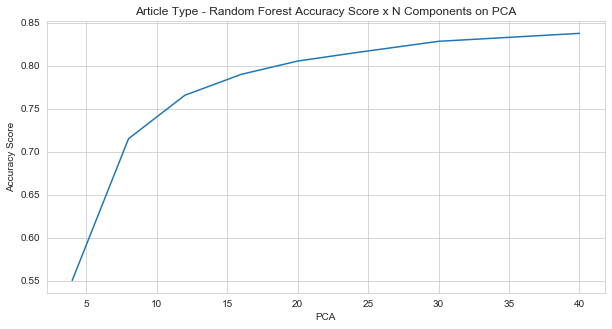

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="PCA", y="Accuracy Score", data=df_rf_accuracy.reset_index())
plt.title('Article Type - Random Forest Accuracy Score x N Components on PCA')

#### Using XGBoost Classifier

In [13]:
from xgboost import XGBClassifier

def get_score_xgboost(X_train,X_test,y_train,y_test):
    # train xgboost
    xgboost = XGBClassifier(random_state=101)
    xgboost.fit(X_train,y_train)
    xgb_models.append(xgboost)

    # get accuracy score
    pred = xgboost.predict(X_test)
    return accuracy_score(y_test, pred)

def xgboost_smote():
    for i in range(len(n_pca)):
        xgb_accuracy_scores.append(get_score_xgboost(smote_x[i],x_tests[i],smote_y[i],y_tests[i]))
    

In [14]:
xgb_models = []
xgb_accuracy_scores = []

xgboost_smote()
    
df_xgb_accuracy = pd.DataFrame(xgb_accuracy_scores,index=n_pca,columns=['Accuracy Score'])
df_xgb_accuracy.index.name = 'PCA'
df_xgb_accuracy.reset_index()

,PCA,Accuracy Score
0,4,0.539718
1,8,0.698367
2,12,0.745366
3,16,0.777140
4,20,0.789056
5,24,0.797220
6,30,0.810900
7,40,0.819285


Text(0.5, 1.0, 'Article Type - XGBoost Accuracy Score x N Components on PCA')

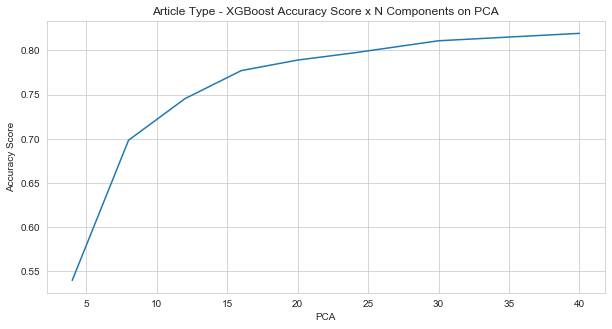

In [15]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="PCA", y="Accuracy Score", data=df_xgb_accuracy.reset_index())
plt.title('Article Type - XGBoost Accuracy Score x N Components on PCA')

#### Without SMOTE

In [16]:
def get_score_randomforest_nosmote(X_train,X_test,y_train,y_test):
    # train randomforest
    randomforest = RandomForestClassifier(random_state=101)
    randomforest.fit(X_train,y_train)
    rf_models_nosmote.append(randomforest)

    # get accuracy score
    pred = randomforest.predict(X_test)
    return accuracy_score(y_test, pred)

def randomforest_nosmote():
    for i in range(len(n_pca)):
        rf_accuracy_scores_nosmote.append(get_score_randomforest_nosmote(x_trains[i],x_tests[i],y_trains[i],y_tests[i]))
    

In [17]:
rf_models_nosmote = []
rf_accuracy_scores_nosmote = []

randomforest_nosmote()
    
df_rf_accuracy_nosmote = pd.DataFrame(rf_accuracy_scores_nosmote,index=n_pca,columns=['Accuracy Score'])
df_rf_accuracy_nosmote.index.name = 'PCA'
df_rf_accuracy_nosmote.reset_index()

,PCA,Accuracy Score
0,4,0.581642
1,8,0.718667
2,12,0.766108
3,16,0.789718
4,20,0.808252
5,24,0.807149
6,30,0.820388
7,40,0.829876


Text(0.5, 1.0, 'Article Type - Random Forest Accuracy Score x N Components on PCA - Without SMOTE')

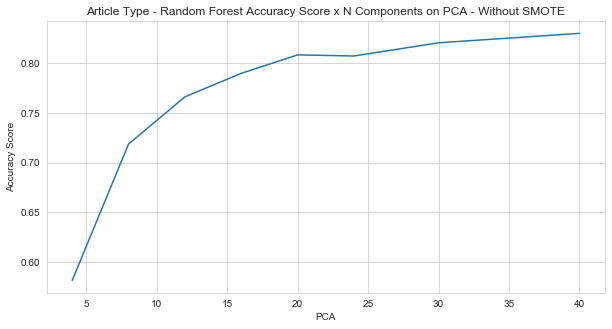

In [18]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="PCA", y="Accuracy Score", data=df_rf_accuracy_nosmote.reset_index())
plt.title('Article Type - Random Forest Accuracy Score x N Components on PCA - Without SMOTE')

In [19]:
def get_score_xgboost_nosmote(X_train,X_test,y_train,y_test):
    # train xgboost
    xgboost = XGBClassifier(random_state=101)
    xgboost.fit(X_train,y_train)
    xgb_models_nosmote.append(xgboost)

    # get accuracy score
    pred = xgboost.predict(X_test)
    return accuracy_score(y_test, pred)

def xgboost_nosmote():
    for i in range(len(n_pca)):
        xgb_accuracy_scores_nosmote.append(get_score_xgboost_nosmote(x_trains[i],x_tests[i],y_trains[i],y_tests[i]))
    

In [20]:
xgb_models_nosmote = []
xgb_accuracy_scores_nosmote = []

xgboost_nosmote()
    
df_xgb_accuracy_nosmote = pd.DataFrame(xgb_accuracy_scores_nosmote,index=n_pca,columns=['Accuracy Score'])
df_xgb_accuracy_nosmote.index.name = 'PCA'
df_xgb_accuracy_nosmote.reset_index()

,PCA,Accuracy Score
0,4,0.571492
1,8,0.705649
2,12,0.753530
3,16,0.783981
4,20,0.788173
5,24,0.806929
6,30,0.813107
7,40,0.819506


Text(0.5, 1.0, 'Article Type - XGBoost Accuracy Score x N Components on PCA - Without SMOTE')

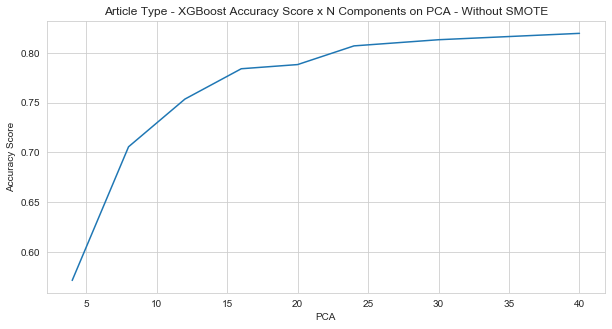

In [21]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="PCA", y="Accuracy Score", data=df_xgb_accuracy_nosmote.reset_index())
plt.title('Article Type - XGBoost Accuracy Score x N Components on PCA - Without SMOTE')

> Based on the results above, we will take the model with the highest accuracy score which is random forest with n pca = 40

> But, because the result is lower than expected (<0.9) we need a new model. After this, we will be looking into the model results on master and sub category. If the results are better (>0.9), this can be a good additional training feature, since article type is dependent on both of them.

In [22]:
import pickle

model_articleType = rf_models[7]
pickle.dump(model_articleType, open('model_articleType.sav', 'wb'))

### Sub Category

#### Random Forest Classifier

In [40]:
n_pca = [4,8,12,16,20,24,30,40]

pca = []
smote_x = []
smote_y = []
x_trains = []
y_trains = []
x_tests = []
y_tests = []
rf_models = []
rf_accuracy_scores = []

do_first_randomforest_smote('subCategory')
    
df_rf_accuracy = pd.DataFrame(rf_accuracy_scores,index=n_pca,columns=['Accuracy Score'])
df_rf_accuracy.index.name = 'PCA'
df_rf_accuracy.reset_index()

,PCA,Accuracy Score
0,4,0.750662
1,8,0.884157
2,12,0.916372
3,16,0.932921
4,20,0.938658
5,24,0.940644
6,30,0.943513
7,40,0.949912


Text(0.5, 1.0, 'Sub Category - Random Forest Accuracy Score x N Components on PCA')

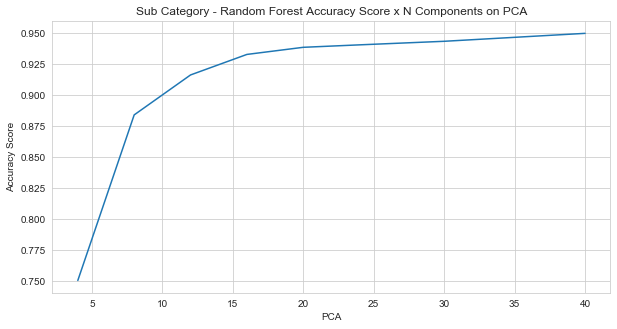

In [41]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="PCA", y="Accuracy Score", data=df_rf_accuracy.reset_index())
plt.title('Sub Category - Random Forest Accuracy Score x N Components on PCA')

#### XGBoost Classifier

In [42]:
xgb_models = []
xgb_accuracy_scores = []

xgboost_smote()
    
df_xgb_accuracy = pd.DataFrame(xgb_accuracy_scores,index=n_pca,columns=['Accuracy Score'])
df_xgb_accuracy.index.name = 'PCA'
df_xgb_accuracy.reset_index()

,PCA,Accuracy Score
0,4,0.729479
1,8,0.878199
2,12,0.913725
3,16,0.927846
4,20,0.937335
5,24,0.941968
6,30,0.945278
7,40,0.944395


Text(0.5, 1.0, 'Sub Category - XGBoost Accuracy Score x N Components on PCA')

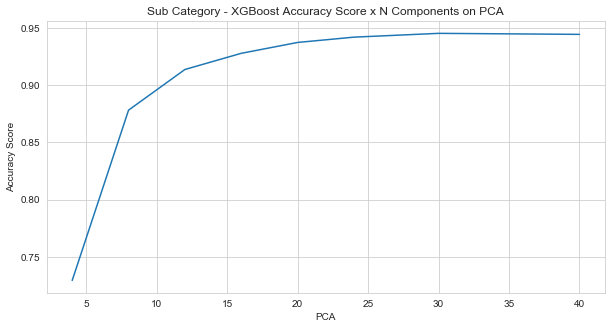

In [43]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="PCA", y="Accuracy Score", data=df_xgb_accuracy.reset_index())
plt.title('Sub Category - XGBoost Accuracy Score x N Components on PCA')

#### Without SMOTE

In [44]:
rf_models_nosmote = []
rf_accuracy_scores_nosmote = []

randomforest_nosmote()
    
df_rf_accuracy_nosmote = pd.DataFrame(rf_accuracy_scores_nosmote,index=n_pca,columns=['Accuracy Score'])
df_rf_accuracy_nosmote.index.name = 'PCA'
df_rf_accuracy_nosmote.reset_index()

,PCA,Accuracy Score
0,4,0.787511
1,8,0.892763
2,12,0.922109
3,16,0.928729
4,20,0.936893
5,24,0.939541
6,30,0.939541
7,40,0.939982


Text(0.5, 1.0, 'Sub Category - Random Forest Accuracy Score x N Components on PCA - Without SMOTE')

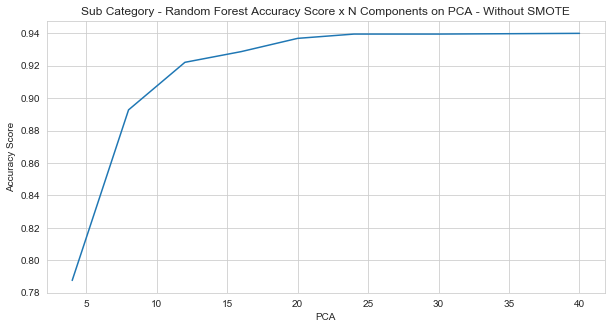

In [45]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="PCA", y="Accuracy Score", data=df_rf_accuracy_nosmote.reset_index())
plt.title('Sub Category - Random Forest Accuracy Score x N Components on PCA - Without SMOTE')

In [46]:
xgb_models_nosmote = []
xgb_accuracy_scores_nosmote = []

xgboost_nosmote()
    
df_xgb_accuracy_nosmote = pd.DataFrame(xgb_accuracy_scores_nosmote,index=n_pca,columns=['Accuracy Score'])
df_xgb_accuracy_nosmote.index.name = 'PCA'
df_xgb_accuracy_nosmote.reset_index()

,PCA,Accuracy Score
0,4,0.777140
1,8,0.894748
2,12,0.919903
3,16,0.932921
4,20,0.936893
5,24,0.940424
6,30,0.943292
7,40,0.942189


Text(0.5, 1.0, 'Sub Category - XGBoost Accuracy Score x N Components on PCA - Without SMOTE')

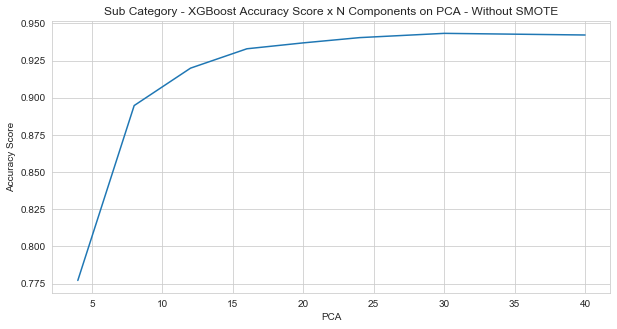

In [47]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="PCA", y="Accuracy Score", data=df_xgb_accuracy_nosmote.reset_index())
plt.title('Sub Category - XGBoost Accuracy Score x N Components on PCA - Without SMOTE')

> Highest accuracy score on random forest using smote with PCA n=40

> Just as planned as before, if the result on master category model is better, we can remodel for sub category by adding a master category as a feature. Hoping it will have better results.

In [48]:
model_subCategory = rf_models[7]
pickle.dump(model_subCategory, open('model_subCategory.sav', 'wb'))

### Master Category

### Random Forest

In [56]:
n_pca = [4,8,12,16,20,24,30,40]

pca = []
smote_x = []
smote_y = []
x_trains = []
y_trains = []
x_tests = []
y_tests = []
rf_models = []
rf_accuracy_scores = []

do_first_randomforest_smote('masterCategory')
    
df_rf_accuracy = pd.DataFrame(rf_accuracy_scores,index=n_pca,columns=['Accuracy Score'])
df_rf_accuracy.index.name = 'PCA'
df_rf_accuracy.reset_index()

,PCA,Accuracy Score
0,4,0.956752
1,8,0.980803
2,12,0.985878
3,16,0.986981
4,20,0.989629
5,24,0.989188
6,30,0.989629
7,40,0.989629


Text(0.5, 1.0, 'Master Category - Random Forest Accuracy Score x N Components on PCA')

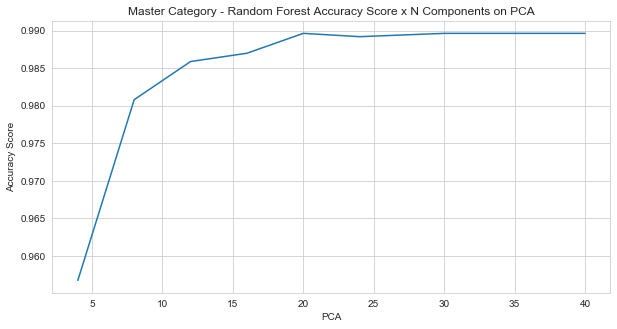

In [24]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="PCA", y="Accuracy Score", data=df_rf_accuracy.reset_index())
plt.title('Master Category - Random Forest Accuracy Score x N Components on PCA')

#### XGBoost

In [57]:
xgb_models = []
xgb_accuracy_scores = []

xgboost_smote()
    
df_xgb_accuracy = pd.DataFrame(xgb_accuracy_scores,index=n_pca,columns=['Accuracy Score'])
df_xgb_accuracy.index.name = 'PCA'
df_xgb_accuracy.reset_index()

,PCA,Accuracy Score
0,4,0.954545
1,8,0.981024
2,12,0.988747
3,16,0.988305
4,20,0.991395
5,24,0.989629
6,30,0.991174
7,40,0.989629


Text(0.5, 1.0, 'Master Category - XGBoost Accuracy Score x N Components on PCA')

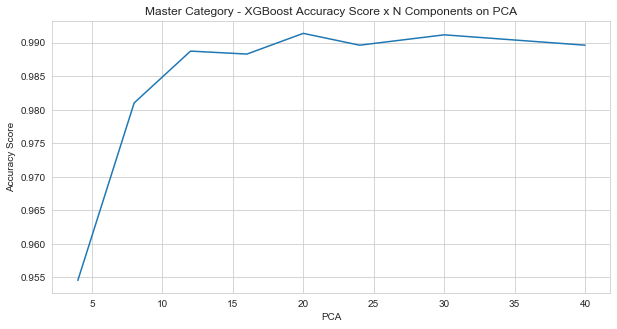

In [26]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="PCA", y="Accuracy Score", data=df_xgb_accuracy.reset_index())
plt.title('Master Category - XGBoost Accuracy Score x N Components on PCA')

### Without SMOTE

In [27]:
rf_models_nosmote = []
rf_accuracy_scores_nosmote = []

randomforest_nosmote()
    
df_rf_accuracy_nosmote = pd.DataFrame(rf_accuracy_scores_nosmote,index=n_pca,columns=['Accuracy Score'])
df_rf_accuracy_nosmote.index.name = 'PCA'
df_rf_accuracy_nosmote.reset_index()

,PCA,Accuracy Score
0,4,0.958076
1,8,0.980362
2,12,0.984554
3,16,0.986099
4,20,0.988747
5,24,0.989409
6,30,0.988967
7,40,0.988747


Text(0.5, 1.0, 'Master Category - Random Forest Accuracy Score x N Components on PCA - Without SMOTE')

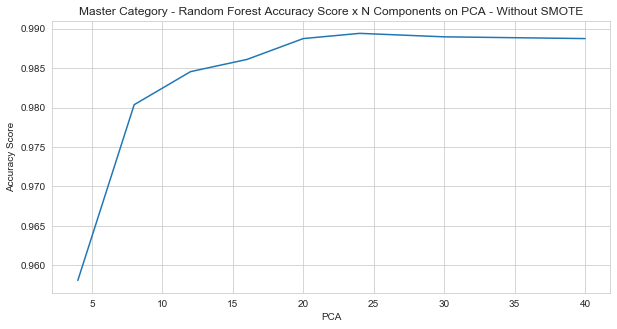

In [28]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="PCA", y="Accuracy Score", data=df_rf_accuracy_nosmote.reset_index())
plt.title('Master Category - Random Forest Accuracy Score x N Components on PCA - Without SMOTE')

In [29]:
xgb_models_nosmote = []
xgb_accuracy_scores_nosmote = []

xgboost_nosmote()
    
df_xgb_accuracy_nosmote = pd.DataFrame(xgb_accuracy_scores_nosmote,index=n_pca,columns=['Accuracy Score'])
df_xgb_accuracy_nosmote.index.name = 'PCA'
df_xgb_accuracy_nosmote.reset_index()

,PCA,Accuracy Score
0,4,0.956752
1,8,0.983010
2,12,0.986761
3,16,0.988305
4,20,0.991174
5,24,0.990733
6,30,0.990733
7,40,0.989629


Text(0.5, 1.0, 'Master Category - XGBoost Accuracy Score x N Components on PCA - Without SMOTE')

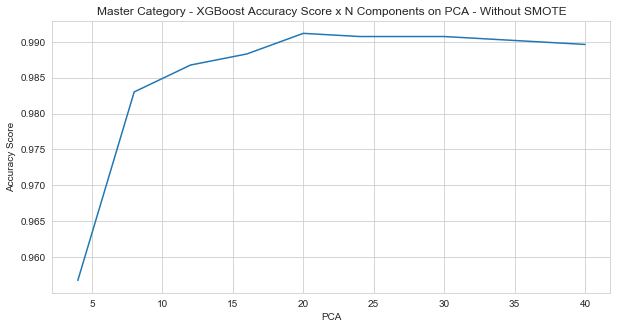

In [30]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="PCA", y="Accuracy Score", data=df_xgb_accuracy_nosmote.reset_index())
plt.title('Master Category - XGBoost Accuracy Score x N Components on PCA - Without SMOTE')

> The result is surprising because the accuracy score is very high (+0.99)

> So we take XGBoost using SMOTE and PCA n=20.

In [58]:
model_masterCategory = xgb_models[4]
pickle.dump(model_masterCategory, open('model_masterCategory_final.sav', 'wb'))

pca_masterCategory_n20 = pca[4]
pickle.dump(pca_masterCategory_n20, open('pca_masterCategory_n20.sav', 'wb'))

### Adding larger categories as training feature for smaller categories

Because there will be an additional categorical data, we will be using get dummies to convert it into numerical

#### Sub Category

In [34]:
def do_second_randomforest_smote(col):
    for i in n_pca:
        # scaling
        scaler = StandardScaler()
        scaler.fit(df_embs)
        scaled_data = scaler.transform(df_embs)

        # pca
        t_pca = PCA(n_components=i,random_state=101)
        t_pca.fit(scaled_data)
        pca.append(t_pca)
        feature_pca = t_pca.transform(df_embs)
        dfPCA = pd.DataFrame(feature_pca,columns=['PCA'+str(j) for j in range(1,i+1)])
        
        # adding feature
        dfPCA = dfPCA.join(pd.get_dummies(df[['masterCategory']],drop_first=True))
        
        # split data
        X = dfPCA
        y = df[col]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

        x_trains.append(X_train)
        y_trains.append(y_train)
        x_tests.append(X_test)
        y_tests.append(y_test)
        
        # oversampling SMOTE
        sm = SMOTE(random_state=101)
        X_sm, y_sm = sm.fit_sample(X_train,y_train)
        smote_x.append(X_sm)
        smote_y.append(y_sm)

        rf_accuracy_scores.append(get_score_randomforest(X_sm,X_test,y_sm,y_test))

In [35]:
# remove the lower values because from the data before, the optimum results are on the higher values
n_pca = [20,24,30,40]

pca = []
smote_x = []
smote_y = []
x_trains = []
y_trains = []
x_tests = []
y_tests = []
rf_models = []
rf_accuracy_scores = []

do_second_randomforest_smote('subCategory')
    
df_rf_accuracy = pd.DataFrame(rf_accuracy_scores,index=n_pca,columns=['Accuracy Score'])
df_rf_accuracy.index.name = 'PCA'
df_rf_accuracy.reset_index()

,PCA,Accuracy Score
0,20,0.945940
1,24,0.947926
2,30,0.946823
3,40,0.954104


In [36]:
xgb_models = []
xgb_accuracy_scores = []

xgboost_smote()
    
df_xgb_accuracy = pd.DataFrame(xgb_accuracy_scores,index=n_pca,columns=['Accuracy Score'])
df_xgb_accuracy.index.name = 'PCA'
df_xgb_accuracy.reset_index()

,PCA,Accuracy Score
0,20,0.947043
1,24,0.943954
2,30,0.950132
3,40,0.949029


### Without SMOTE

In [37]:
rf_models_nosmote = []
rf_accuracy_scores_nosmote = []

randomforest_nosmote()
    
df_rf_accuracy_nosmote = pd.DataFrame(rf_accuracy_scores_nosmote,index=n_pca,columns=['Accuracy Score'])
df_rf_accuracy_nosmote.index.name = 'PCA'
df_rf_accuracy_nosmote.reset_index()

,PCA,Accuracy Score
0,20,0.942410
1,24,0.942630
2,30,0.944175
3,40,0.943513


In [38]:
xgb_models_nosmote = []
xgb_accuracy_scores_nosmote = []

xgboost_nosmote()
    
df_xgb_accuracy_nosmote = pd.DataFrame(xgb_accuracy_scores_nosmote,index=n_pca,columns=['Accuracy Score'])
df_xgb_accuracy_nosmote.index.name = 'PCA'
df_xgb_accuracy_nosmote.reset_index()

,PCA,Accuracy Score
0,20,0.944395
1,24,0.947705
2,30,0.948588
3,40,0.952560


> As expected, the results are better. The best model here is Random Forest with SMOTE and PCA n=40

In [39]:
model_subCategory = rf_models[3]
pickle.dump(model_subCategory, open('model_subCategory_final.sav', 'wb'))

pca_subCategory_n40 = pca[3]
pickle.dump(pca_subCategory_n40, open('pca_subCategory_n40.sav', 'wb'))

Now we be using the same method for articleType but with additional subCategory as a feature

### Article Type

In [40]:
def do_third_randomforest_smote(col):
    for i in n_pca:
        # scaling
        scaler = StandardScaler()
        scaler.fit(df_embs)
        scaled_data = scaler.transform(df_embs)

        # pca
        t_pca = PCA(n_components=i,random_state=101)
        t_pca.fit(scaled_data)
        pca.append(t_pca)
        feature_pca = t_pca.transform(df_embs)
        dfPCA = pd.DataFrame(feature_pca,columns=['PCA'+str(j) for j in range(1,i+1)])
        
        # adding feature
        dfPCA = dfPCA.join(pd.get_dummies(df[['masterCategory']],drop_first=True))
        dfPCA = dfPCA.join(pd.get_dummies(df[['subCategory']],drop_first=True))
        
        # split data
        X = dfPCA
        y = df[col]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

        x_trains.append(X_train)
        y_trains.append(y_train)
        x_tests.append(X_test)
        y_tests.append(y_test)
        
        # oversampling SMOTE
        sm = SMOTE(random_state=101)
        X_sm, y_sm = sm.fit_sample(X_train,y_train)
        smote_x.append(X_sm)
        smote_y.append(y_sm)

        rf_accuracy_scores.append(get_score_randomforest(X_sm,X_test,y_sm,y_test))

In [41]:
n_pca = [20,24,30,40]

pca = []
smote_x = []
smote_y = []
x_trains = []
y_trains = []
x_tests = []
y_tests = []
rf_models = []
rf_accuracy_scores = []

do_third_randomforest_smote('articleType')
    
df_rf_accuracy = pd.DataFrame(rf_accuracy_scores,index=n_pca,columns=['Accuracy Score'])
df_rf_accuracy.index.name = 'PCA'
df_rf_accuracy.reset_index()

,PCA,Accuracy Score
0,20,0.858120
1,24,0.864298
2,30,0.869153
3,40,0.876655


In [42]:
xgb_models = []
xgb_accuracy_scores = []

xgboost_smote()
    
df_xgb_accuracy = pd.DataFrame(xgb_accuracy_scores,index=n_pca,columns=['Accuracy Score'])
df_xgb_accuracy.index.name = 'PCA'
df_xgb_accuracy.reset_index()

,PCA,Accuracy Score
0,20,0.849956
1,24,0.859444
2,30,0.865622
3,40,0.876214


#### Without SMOTE

In [43]:
rf_models_nosmote = []
rf_accuracy_scores_nosmote = []

randomforest_nosmote()
    
df_rf_accuracy_nosmote = pd.DataFrame(rf_accuracy_scores_nosmote,index=n_pca,columns=['Accuracy Score'])
df_rf_accuracy_nosmote.index.name = 'PCA'
df_rf_accuracy_nosmote.reset_index()

,PCA,Accuracy Score
0,20,0.855914
1,24,0.860327
2,30,0.866064
3,40,0.871801


In [44]:
xgb_models_nosmote = []
xgb_accuracy_scores_nosmote = []

xgboost_nosmote()
    
df_xgb_accuracy_nosmote = pd.DataFrame(xgb_accuracy_scores_nosmote,index=n_pca,columns=['Accuracy Score'])
df_xgb_accuracy_nosmote.index.name = 'PCA'
df_xgb_accuracy_nosmote.reset_index()

,PCA,Accuracy Score
0,20,0.849956
1,24,0.854590
2,30,0.861871
3,40,0.873345


> The result isn't still satisfying (<0.9) but the difference is noticable. So we will take the highest accuracy model which is random forest with SMOTE and PCA n=40

In [45]:
model_articleType = rf_models[3]
pickle.dump(model_articleType, open('model_articleType_final.sav', 'wb'))

pca_articleType_n40 = pca[3]
pickle.dump(pca_articleType_n40, open('pca_articleType_n40.sav', 'wb'))

### Gender Prediction
Because gender is a sub category of article type. We will design the model similar to the previous one which includes master and sub category as a feature. But now we add article type as a feature.

In [46]:
def do_fourth_randomforest_smote(col):
    for i in n_pca:
        # scaling
        scaler = StandardScaler()
        scaler.fit(df_embs)
        scaled_data = scaler.transform(df_embs)

        # pca
        t_pca = PCA(n_components=i,random_state=101)
        t_pca.fit(scaled_data)
        pca.append(t_pca)
        feature_pca = t_pca.transform(df_embs)
        dfPCA = pd.DataFrame(feature_pca,columns=['PCA'+str(j) for j in range(1,i+1)])
        
        # adding feature
        dfPCA = dfPCA.join(pd.get_dummies(df[['masterCategory']],drop_first=True))
        dfPCA = dfPCA.join(pd.get_dummies(df[['subCategory']],drop_first=True))
        dfPCA = dfPCA.join(pd.get_dummies(df[['articleType']],drop_first=True))

        # split data
        X = dfPCA
        y = df[col]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

        x_trains.append(X_train)
        y_trains.append(y_train)
        x_tests.append(X_test)
        y_tests.append(y_test)
        
        # oversampling SMOTE
        sm = SMOTE(random_state=101)
        X_sm, y_sm = sm.fit_sample(X_train,y_train)
        smote_x.append(X_sm)
        smote_y.append(y_sm)

        rf_accuracy_scores.append(get_score_randomforest(X_sm,X_test,y_sm,y_test))

In [47]:
n_pca = [20,24,30,40]

pca = []
smote_x = []
smote_y = []
x_trains = []
y_trains = []
x_tests = []
y_tests = []
rf_models = []
rf_accuracy_scores = []

do_fourth_randomforest_smote('gender')
    
df_rf_accuracy = pd.DataFrame(rf_accuracy_scores,index=n_pca,columns=['Accuracy Score'])
df_rf_accuracy.index.name = 'PCA'
df_rf_accuracy.reset_index()

,PCA,Accuracy Score
0,20,0.887026
1,24,0.891659
2,30,0.895631
3,40,0.895852


In [48]:
xgb_models = []
xgb_accuracy_scores = []

xgboost_smote()
    
df_xgb_accuracy = pd.DataFrame(xgb_accuracy_scores,index=n_pca,columns=['Accuracy Score'])
df_xgb_accuracy.index.name = 'PCA'
df_xgb_accuracy.reset_index()

,PCA,Accuracy Score
0,20,0.883936
1,24,0.892101
2,30,0.893866
3,40,0.889894


#### Without SMOTE

In [49]:
rf_models_nosmote = []
rf_accuracy_scores_nosmote = []

randomforest_nosmote()
    
df_rf_accuracy_nosmote = pd.DataFrame(rf_accuracy_scores_nosmote,index=n_pca,columns=['Accuracy Score'])
df_rf_accuracy_nosmote.index.name = 'PCA'
df_rf_accuracy_nosmote.reset_index()

,PCA,Accuracy Score
0,20,0.891880
1,24,0.899603
2,30,0.896734
3,40,0.903354


In [50]:
xgb_models_nosmote = []
xgb_accuracy_scores_nosmote = []

xgboost_nosmote()
    
df_xgb_accuracy_nosmote = pd.DataFrame(xgb_accuracy_scores_nosmote,index=n_pca,columns=['Accuracy Score'])
df_xgb_accuracy_nosmote.index.name = 'PCA'
df_xgb_accuracy_nosmote.reset_index()

,PCA,Accuracy Score
0,20,0.892321
1,24,0.896072
2,30,0.903133
3,40,0.905340


> The results are actually better than expected, remembering that gender's classes are mixed between categories. So we will take the best model, which is XGBoost without SMOTE and PCA n=40

In [51]:
model_gender = xgb_models_nosmote[3]
pickle.dump(model_gender, open('model_gender_final.sav', 'wb'))

pca_gender_n40 = pca[3]
pickle.dump(pca_gender_n40, open('pca_gender_n40.sav', 'wb'))

### Hyperparameter on selected models
In summary, we use the following models:
- Master Category : XGBoost, with SMOTE, PCA n=20
- Sub Category : Random Forest, with SMOTE, PCA n=40
- Article Type : Random Forest, with SMOTE, PCA n=40
- Gender : XGBoost, without SMOTE, PCA n=40

#### Hyperparameter on Master Category

In [52]:
from sklearn.model_selection import GridSearchCV

def get_grid_search(col,n_pca,use_smote,grid_model,grid_param) :

    grid = GridSearchCV(grid_model(random_state=101),grid_param, cv=3, scoring='accuracy')

    if (col=='masterCategory'):
        t_pca = pca_masterCategory_n20
    elif (col=='subCategory'):
        t_pca = pca_subCategory_n40
    elif (col=='articleType'):
        t_pca = pca_articleType_n40
    elif (col=='gender'):
        t_pca = pca_gender_n40

    feature_pca = t_pca.transform(df_embs)
    dfPCA = pd.DataFrame(feature_pca,columns=['PCA'+str(j) for j in range(1,n_pca+1)])

    # adding features
    if (not col=='masterCategory'):
        dfPCA = dfPCA.join(pd.get_dummies(df[['masterCategory']],drop_first=True))
    if (col=='articleType' or col=='gender'):
        dfPCA = dfPCA.join(pd.get_dummies(df[['subCategory']],drop_first=True))
    if (col=='gender'):
        dfPCA = dfPCA.join(pd.get_dummies(df[['articleType']],drop_first=True))
        
    # split data
    X = dfPCA
    y = df[col]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

    # oversampling SMOTE
    if (use_smote):
        sm = SMOTE(random_state=101)
        X_sm, y_sm = sm.fit_sample(X_train,y_train)
        X_train = X_sm
        y_train = y_sm
        
    x_trains.append(X_train)
    y_trains.append(y_train)
    x_tests.append(X_test)
    y_tests.append(y_test)
    
    grid.fit(X_train,y_train)

    return grid

In [59]:
param = {"learning_rate" : [0.05, 0.15, 0.30 ],
         "max_depth" : [ 4, 6, 8 ],
         "min_child_weight" : [ 1, 3 ] }

x_trains = []
x_tests = []
y_trains = []
y_tests = []

grid_mc = get_grid_search('masterCategory',20,True,XGBClassifier,param)
grid_mc.best_params_

{'learning_rate': 0.3, 'max_depth': 4, 'min_child_weight': 1}

In [60]:
model_masterCategory = XGBClassifier(learning_rate=0.3, max_depth=4, min_child_weight=1, random_state=101)
model_masterCategory.fit(x_trains[0],y_trains[0])

pred = model_masterCategory.predict(x_tests[0])
print('Accuracy Score Master Category Model: '+ str(accuracy_score(y_tests[0],pred)))

Accuracy Score Master Category Model: 0.9918358340688438


#### Hyperparameter on Sub Category

In [61]:
param = {'max_depth': [30, 60, 90, None],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10]}

x_trains = []
x_tests = []
y_trains = []
y_tests = []

grid_sc = get_grid_search('subCategory',40,True,RandomForestClassifier,param)
grid_sc.best_params_

{'max_depth': 60, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [62]:
model_subCategory = RandomForestClassifier(max_depth=60, min_samples_leaf=1, min_samples_split=2,random_state=101)
model_subCategory.fit(x_trains[0],y_trains[0])

pred = model_subCategory.predict(x_tests[0])
print('Accuracy Score Sub Category Model: '+ str(accuracy_score(y_tests[0],pred)))

Accuracy Score Sub Category Model: 0.9541041482789056


#### Hyperparameter on Article Type

In [64]:
param = {'max_depth': [30, 60, 90, None],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10]}

x_trains = []
x_tests = []
y_trains = []
y_tests = []

grid_at = get_grid_search('articleType',40,True,RandomForestClassifier,param)
grid_at.best_params_

{'max_depth': 60, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [65]:
model_articleType = RandomForestClassifier(max_depth=60, min_samples_leaf=1, min_samples_split=2,random_state=101)
model_articleType.fit(x_trains[0],y_trains[0])

pred = model_articleType.predict(x_tests[0])
print('Accuracy Score Article Type Model: '+ str(accuracy_score(y_tests[0],pred)))

Accuracy Score Article Type Model: 0.8766548984995587


#### Hyperparameter on Gender

In [67]:
param = {"learning_rate" : [0.05, 0.15, 0.30 ],
         "max_depth" : [ 4, 6, 8 ],
         "min_child_weight" : [ 1, 3 ] }

x_trains = []
x_tests = []
y_trains = []
y_tests = []

grid_g = get_grid_search('gender',40,False,XGBClassifier,param)
grid_g.best_params_

{'learning_rate': 0.3, 'max_depth': 8, 'min_child_weight': 1}

In [68]:
model_gender = XGBClassifier(learning_rate=0.3, max_depth=8, min_child_weight=1, random_state=101)
model_gender.fit(x_trains[0],y_trains[0])

pred = model_gender.predict(x_tests[0])
print('Accuracy Score Gender Model: '+ str(accuracy_score(y_tests[0],pred)))

Accuracy Score Gender Model: 0.9106354810238305


### Saving Final Models

In [69]:
pickle.dump(model_masterCategory, open('model_masterCategory_final_hyper.sav', 'wb'))
pickle.dump(model_subCategory, open('model_subCategory_final_hyper.sav', 'wb'))
pickle.dump(model_articleType, open('model_articleType_final_hyper.sav', 'wb'))
pickle.dump(model_gender, open('model_gender_final_hyper.sav', 'wb'))

In [70]:
pd.get_dummies(df[['articleType']],drop_first=True)

,articleType_Belts,articleType_Bra,articleType_Briefs,articleType_Capris,articleType_Caps,articleType_Casual Shoes,articleType_Clutches,articleType_Deodorant,articleType_Dresses,articleType_Dupatta,...,articleType_Sweatshirts,articleType_Ties,articleType_Tops,articleType_Track Pants,articleType_Trousers,articleType_Trunk,articleType_Tshirts,articleType_Tunics,articleType_Wallets,articleType_Watches
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
